<a href="https://colab.research.google.com/github/noahmott/ww1wordcloudnlp/blob/main/ww1wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import json


In [56]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import urllib
import requests
import pymongo
from bs4 import BeautifulSoup as bs1
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import seaborn as sns
from textblob import TextBlob, Word, Blobber
from nltk.stem import PorterStemmer
st = PorterStemmer()
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10.7,6.27)})
from PIL import Image
import numpy as np
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
f=open('/content/drive/MyDrive/letters.json',)

In [22]:
data=json.load(f)

In [23]:
n=list(data.keys())

In [24]:
english=n[20:]

In [25]:
m={k:v for k,v in data.items() if k in english}

In [26]:
m['na_uk_06']

'I might say we are all merry and bright and not down hearted yet.\n\nDear Mr Hunt,\n\nReceived card alright for which I must thank you very much. We are still at Longmoor and no signs of moving as I have been made cook’s mate and had to work very hard all through Xmas.\n\nSapper Hodges'

In [42]:
full_text=' '.join(x.lower() for x in m.values())

In [43]:
full_text=full_text.replace('[^\w\s]', '')

In [44]:
full_text[:45]

'dear mr welsh,\n\nwe were only out here a matte'

In [45]:
def clean(txt):
    txt = txt.replace("(<br/>)", "")
    txt = txt.replace('(<a).*(>).*(</a>)', '')
    txt = txt.replace('(&amp)', '')
    txt = txt.replace('(&gt)', '')
    txt = txt.replace('(&lt)', '')
    txt = txt.replace('(\xa0)', ' ')  
    return txt

In [46]:
full_text=clean(full_text)

In [47]:
full_text[:45]

'dear mr welsh,\n\nwe were only out here a matte'

In [49]:
stop = stopwords.words('english')

In [50]:
my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['super', 'tell', 'went','got', 'lot', 'thing', 'say', 'come', 'sent', 'left', 'good', 'day', 'days', 'night', 'getting', 'mr', 'dear', 'right', 'ago','make', 'duper', 'forewarned', 'airy', 'youre', 'bit', 'yeasty', 'going', 'sodium','felt','place','burnt', 'like', 'really', 'best', 'amazing', 'social', 'house', 'definitely', 'awesome', 'castaways', 'greasy','came', 'guy', 'wasnt', 'theyd' 'got', 'dont','looked', 'know', 'hesitant', 'hard', 'sad', 'little', 'wouldnt', 'prices'])

In [51]:
def setListOfcolor_func(word=None, font_size=None,  
                     position=None, orientation=None,  
                     font_path=None, random_state=None):  
    #define the list of set colors  
    color_list = ["#a68856", "#34a8c8", "#969c60", "#52aa91", "#a25a5c"]  

    #return a random color in the list  
    return np.random.choice(color_list)  

In [58]:
font_path='/content/drive/MyDrive/TypewriterRusticRNH-Regular.otf'

In [53]:
mask=np.array(Image.open('/content/drive/MyDrive/soldier1.PNG'))

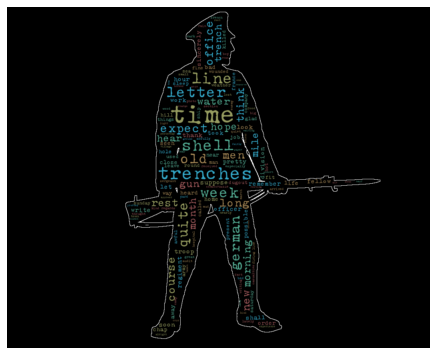

In [59]:
wc = WordCloud(stopwords=my_stop_words,
                background_color="black",
               max_words=150, max_font_size=70,
               random_state=49, color_func=setListOfcolor_func, font_path=font_path,
                width=mask.shape[0], mask=mask,
               height=mask.shape[0], contour_color='white', contour_width=1)
wc.generate(full_text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [60]:
wc.to_file('ww1.png')